#Customer Segmentation Project

## E-Commerce Data
###Context

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, the [UCI Machine Learning Repository](http://archive.ics.uci.edu/) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

###Content

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Load the data

Dictionary of dataset variables:
- InvoiceNo: Invoice number.
- StockCode: Product code.
- Description: Description of the product.
- Quantity: Number of products in the transaction.
- InvoiceDate: Date of invoice.
- UnitPrice: Unit price of each product in the transaction.
- CustomerID: Customer identification.
- Country: Country where the transaction took place.

In [ ]:
df = pd.read_csv("customer_segmentation.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The following information can be extracted:
- The variable 'CustomerID' is of type float64. It must be transformed to int64.
- There are missing values in the column 'Description' and 'CustomerID'.
- The 'InvoiceNo' is of type object.

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611121,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


- There are negative values for the variables 'Quantity' and 'UnitPrice'. We must evaluate the reason for these negative values.

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


There are a large number of null values for the variable 'CustomerID'. Without this record, we will not be able to identify the customers who have made these transactions. The scope of this project includes knowing the customers.

Only keep observations without missing customer ID's:

In [ ]:
customers = df[df.CustomerID.notnull()]

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Now we have a uniform record. Even the missing values in 'Description' are not present now, as they were probably associated with a row where the 'CustomerID' was absent.

Transform the data type of the 'CustomerID' column:

In [ ]:
customers['CustomerID'] = customers['CustomerID'].astype(int)

<ipython-input-10-e7c74db915e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['CustomerID'] = customers['CustomerID'].astype(int)


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [ ]:
customers.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,406829,406829,406829,406829
unique,22190,3684,3885,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2077,2070,361878


- We know that there are 22190 invoices and 3684 products.

Evaluate duplicate columns:

In [ ]:
customers.duplicated().sum()

5225

In [ ]:
customers.drop_duplicates(inplace=True)

<ipython-input-14-05c6236a898c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.drop_duplicates(inplace=True)


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


We now have a uniform data set with no duplicate or missing data.

### Add total sales price column

In the dataset we have only the unit price, but it can be useful to have the total price of the transaction. This is obtained by multiplying 'Quantity' by 'UnitPrice' and get the total price.

In [ ]:
customers['TotalPrice'] = customers['Quantity'] * customers['UnitPrice']
customers.TotalPrice.head()

<ipython-input-16-d0c7306312d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['TotalPrice'] = customers['Quantity'] * customers['UnitPrice']


,TotalPrice
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


In [ ]:
customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### Analyze the customer universe

In [ ]:
customers['CustomerID'].value_counts()

,count
CustomerID,
17841,7812
14911,5898
14096,5128
12748,4459
14606,2759
...,...
18068,1
13256,1
15590,1


Our universe of customers is 4372, who have made several transactions according to the 'InvoiceNo'.

### Analyze the product universe

In [ ]:
customers['StockCode'].value_counts()

,count
StockCode,
85123A,2065
22423,1894
85099B,1659
47566,1409
84879,1405
...,...
90104,1
90135,1
90027D,1


The total number of unique products sold is 3684.

### Analyze Negative Transactions

In [ ]:
customers.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,401604.000000,401604,401604.000000,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474074,15281.160818,20.613648
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,4.250000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000,11.700000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,250.283037,NaN,69.764035,1714.006089,430.352218


In [ ]:
negative_quantity = customers[customers['Quantity'] < 0]
negative_unit_price = customers[customers['UnitPrice'] < 0]

print("Negative values in Quantity:")
print(negative_quantity.value_counts().sum())

print("\nNegative values in UnitPrice:")
print(negative_unit_price.value_counts().sum())

Valores negativos en Quantity:
8872

Valores negativos en UnitPrice:
0


In [ ]:
negative_quantity_with_customerID = negative_quantity[['CustomerID', 'Quantity', 'InvoiceNo']]
print(negative_quantity_with_customerID)

        CustomerID  Quantity InvoiceNo
141          14527        -1   C536379
154          15311        -1   C536383
235          17548       -12   C536391
236          17548       -24   C536391
237          17548       -24   C536391
...            ...       ...       ...
540449       14397       -11   C581490
541541       15498        -1   C581499
541715       15311        -5   C581568
541716       17315        -1   C581569
541717       17315        -5   C581569

[8872 rows x 3 columns]


In [ ]:
customers['TransactionType'] = 'Completed'
customers.loc[customers['InvoiceNo'].str.startswith('C', na=False), 'TransactionType'] = 'Cancelled'

<ipython-input-23-25da387b5f9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['TransactionType'] = 'Completed'


In [ ]:
cancelled_invoice_count = customers[customers['TransactionType'] == 'Cancelled'].shape[0]
print(f"Number of invoices cancelled: {cancelled_invoice_count}")

Número de facturas canceladas: 8872


In [ ]:
customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TransactionType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Completed


## Segmentations

### RFM Features

### Recency

Recency (R): This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.

In [ ]:
customers_completed = customers[customers['TransactionType'] == 'Completed']

In [ ]:
#  Define reference date (maximum transaction date)
reference_date = customers_completed['InvoiceDate'].max()

In [ ]:
# Calculate the recency (days since last purchase to reference date)
recency = customers_completed.groupby('CustomerID').agg({'InvoiceDate': lambda x: (reference_date - x.max()).days}).reset_index()
recency.columns = ['CustomerID', 'Recency']

In [ ]:
recency['RecencySegment'] = pd.qcut(recency['Recency'], 4, labels=['Very Recent', 'Recent', 'Not Recent', 'Dormant'])

In [ ]:
recency.head()

,CustomerID,Recency,RecencySegment
0,12346,325,Dormant
1,12347,1,Very Recent
2,12348,74,Not Recent
3,12349,18,Recent
4,12350,309,Dormant


### Frecuency

Frequency (F): is the number of times a customer buys from a company in a given period of time.

In [ ]:
# Count how many purchases each customer has made (frequency).
frequency = customers_completed.groupby('CustomerID').agg({'InvoiceNo': 'nunique'}).reset_index()
frequency.columns = ['CustomerID', 'Frequency']

In [ ]:
frequency.sort_values(ascending=False, by='Frequency')

,CustomerID,Frequency
326,12748,210
1880,14911,201
4011,17841,124
562,13089,97
1662,14606,93
...,...,...
1476,14355,1
793,13403,1
2306,15488,1
1474,14353,1


In [ ]:
frequency['FrequencySegment'] = pd.cut(frequency['Frequency'], bins=[0, 1, 3, 5, frequency['Frequency'].max()], labels=['Low', 'Medium', 'High', 'Very High'])

In [ ]:
frequency['Frequency'].value_counts(ascending=False)

,count
Frequency,
1,1494
2,835
3,508
4,387
5,243
6,172
7,143
8,98
9,68


In [ ]:
frequency.head()

,CustomerID,Frequency,FrequencySegment
0,12346,1,Low
1,12347,7,Very High
2,12348,4,High
3,12349,1,Low
4,12350,1,Low


### Monetary

Monetary (M): This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

In [ ]:
 # Calculate the total spent by each customer (monetary)
monetary = customers_completed.groupby('CustomerID').agg({'TotalPrice': 'sum'}).reset_index()
monetary.columns = ['CustomerID', 'Monetary']

In [ ]:
monetary.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [ ]:
monetary['MonetarySegment'] = pd.qcut(monetary['Monetary'], 4, labels=['Low', 'Medium', 'High', 'Very High'], duplicates='drop')

In [ ]:
monetary.head()

,CustomerID,Monetary,MonetarySegment
0,12346,77183.60,Very High
1,12347,4310.00,Very High
2,12348,1797.24,Very High
3,12349,1757.55,Very High
4,12350,334.40,Medium


### Combining recency, frequency and monetary analysis

In [ ]:
# Combining recency, frequency and monetary analysis
rfm = pd.merge(pd.merge(recency, frequency, on='CustomerID'), monetary, on='CustomerID')

In [ ]:
rfm.head()

,CustomerID,Recency,RecencySegment,Frequency,FrequencySegment,Monetary,MonetarySegment
0,12346,325,Dormant,1,Low,77183.60,Very High
1,12347,1,Very Recent,7,Very High,4310.00,Very High
2,12348,74,Not Recent,4,High,1797.24,Very High
3,12349,18,Recent,1,Low,1757.55,Very High
4,12350,309,Dormant,1,Low,334.40,Medium


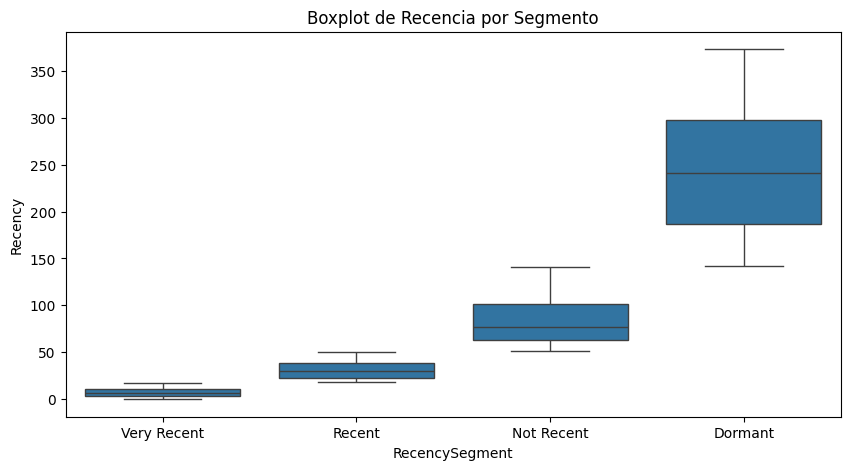

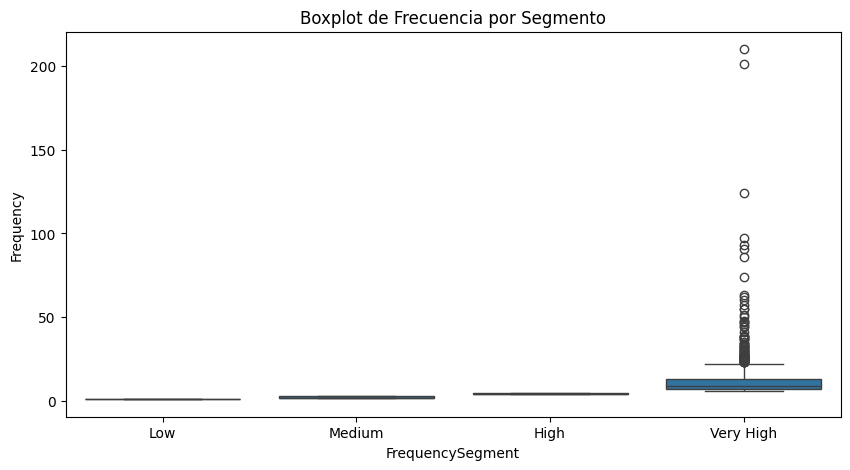

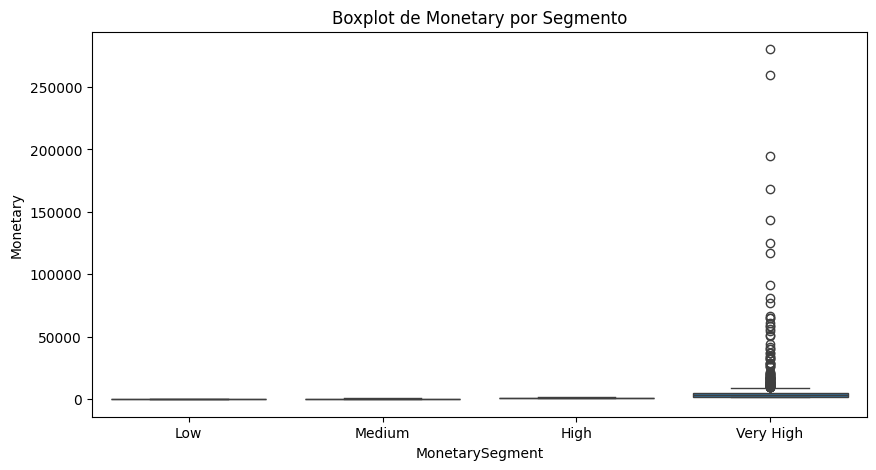

In [ ]:
# Boxplot de Recencia por segmento
plt.figure(figsize=(10,5))
sns.boxplot(x='RecencySegment', y='Recency', data=rfm)
plt.title('Boxplot de Recencia por Segmento')
plt.show()

# Boxplot de Frecuencia por segmento
plt.figure(figsize=(10,5))
sns.boxplot(x='FrequencySegment', y='Frequency', data=rfm)
plt.title('Boxplot de Frecuencia por Segmento')
plt.show()

# Boxplot de Monetary por segmento
plt.figure(figsize=(10,5))
sns.boxplot(x='MonetarySegment', y='Monetary', data=rfm)
plt.title('Boxplot de Monetary por Segmento')
plt.show()


### Applying KMeans

In [ ]:
rfm_data = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']]

# Standarize columns
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

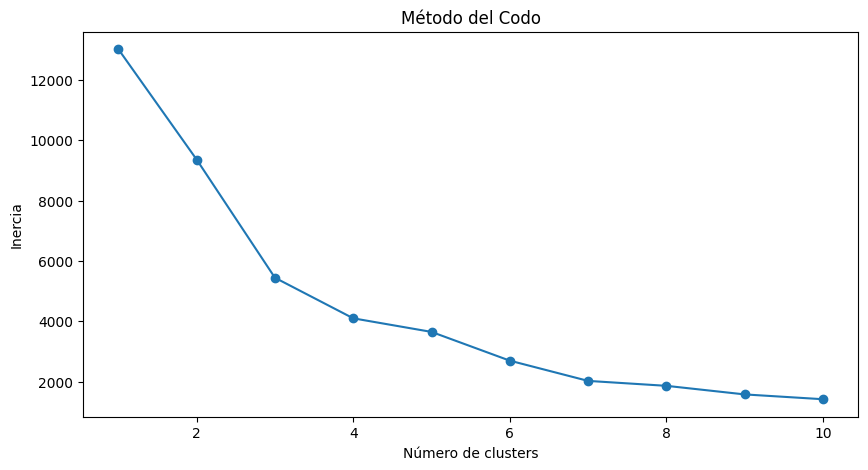

In [ ]:
#Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

<ipython-input-47-f22c01c6ddc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [ ]:
print(rfm_data.head())

   CustomerID  Recency  Frequency  Monetary  Cluster
0       12346      325          1  77183.60        0
1       12347        1          7   4310.00        3
2       12348       74          4   1797.24        3
3       12349       18          1   1757.55        3
4       12350      309          1    334.40        1


In [ ]:
# Example: Filter cluster 2 customers
clientes_cluster_2 = rfm_data[rfm_data['Cluster'] == 2]
print(clientes_cluster_2[['CustomerID', 'Recency', 'Frequency', 'Monetary']])

      CustomerID  Recency  Frequency   Monetary
55         12415       23         21  124914.53
326        12748        0        210   33053.19
562        13089        2         97   58762.08
1334       14156        9         55  117210.08
1690       14646        1         74  280206.02
1880       14911        0        201  143711.17
2177       15311        0         91   60632.75
2703       16029       38         63   80850.84
3009       16446        0          2  168472.50
3729       17450        7         46  194390.79
3772       17511        2         31   91062.38
4011       17841        1        124   40519.84
4202       18102        0         60  259657.30


### PCA

<ipython-input-50-9ce98aabcc58>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['PCA1'] = pca_rfm[:, 0]


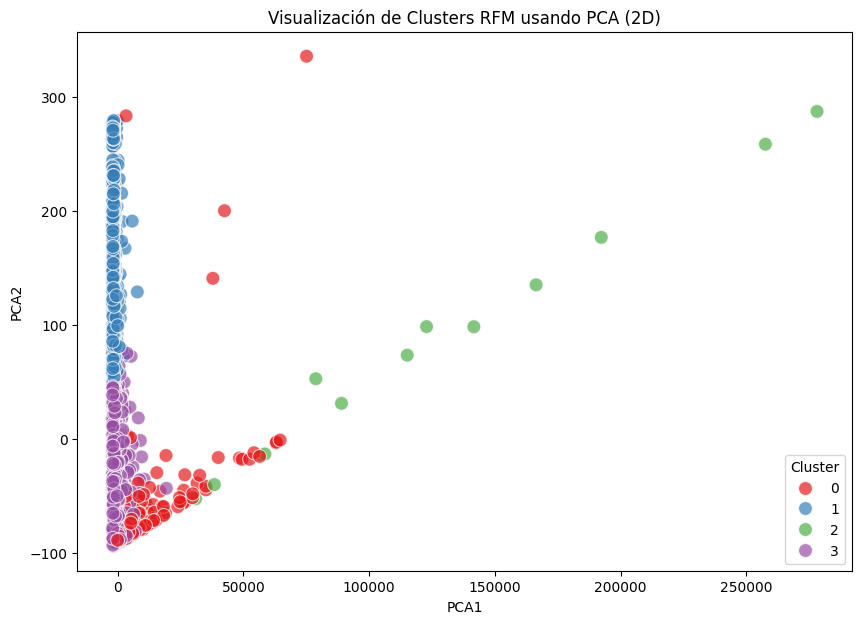

In [ ]:
pca = PCA(n_components=2)
pca_rfm = pca.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Crear un DataFrame con los resultados del PCA
rfm_data['PCA1'] = pca_rfm[:, 0]
rfm_data['PCA2'] = pca_rfm[:, 1]

# Graficar los clusters en función de las dos componentes principales
plt.figure(figsize=(10,7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=rfm_data, palette='Set1', s=100, alpha=0.7)
plt.title('Visualización de Clusters RFM usando PCA (2D)')
plt.show()